In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler, PolynomialFeatures
from sklearn.linear_model import LinearRegression, Ridge , LogisticRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import cross_val_score, train_test_split
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score
from sklearn.ensemble import RandomForestClassifier

In [2]:
df=pd.read_csv('Training Data.csv',header=None)

C:\Users\User\AppData\Local\Temp\ipykernel_24256\778378375.py:1: DtypeWarning: Columns (0,1,2,3,10,11,12) have mixed types. Specify dtype option on import or set low_memory=False.
  df=pd.read_csv('Training Data.csv',header=None)


In [3]:
print(df.head())

   0        1    2           3               4                5   \
0  Id   Income  Age  Experience  Married/Single  House_Ownership   
1   1  1303834   23           3          single           rented   
2   2  7574516   40          10          single           rented   
3   3  3991815   66           4         married           rented   
4   4  6256451   41           2          single           rented   

              6                    7            8               9   \
0  Car_Ownership           Profession         CITY           STATE   
1             no  Mechanical_engineer         Rewa  Madhya_Pradesh   
2             no   Software_Developer     Parbhani     Maharashtra   
3             no     Technical_writer    Alappuzha          Kerala   
4            yes   Software_Developer  Bhubaneswar          Odisha   

                10                 11         12  
0  CURRENT_JOB_YRS  CURRENT_HOUSE_YRS  Risk_Flag  
1                3                 13          0  
2                

In [4]:
df.columns=('Id','Income','Age','Exp','Status','House','Car','Profession','City','State','Current Job','Current House','Risk Flag')
df.drop(0,inplace=True)
df.reset_index(drop=True,inplace=True)

In [5]:
df['Martial']= df['Status'].copy()
df['House_Status']= df['House'].copy()
df['Car_O']= df['Car'].copy()

In [6]:
print(df.head())

  Id   Income Age Exp   Status   House  Car           Profession  \
0  1  1303834  23   3   single  rented   no  Mechanical_engineer   
1  2  7574516  40  10   single  rented   no   Software_Developer   
2  3  3991815  66   4  married  rented   no     Technical_writer   
3  4  6256451  41   2   single  rented  yes   Software_Developer   
4  5  5768871  47  11   single  rented   no        Civil_servant   

                  City           State Current Job Current House Risk Flag  \
0                 Rewa  Madhya_Pradesh           3            13         0   
1             Parbhani     Maharashtra           9            13         0   
2            Alappuzha          Kerala           4            10         0   
3          Bhubaneswar          Odisha           2            12         1   
4  Tiruchirappalli[10]      Tamil_Nadu           3            14         1   

   Martial House_Status Car_O  
0   single       rented    no  
1   single       rented    no  
2  married       rented   

In [7]:
print(df.dtypes)

Id               object
Income           object
Age              object
Exp              object
Status           object
House            object
Car              object
Profession       object
City             object
State            object
Current Job      object
Current House    object
Risk Flag        object
Martial          object
House_Status     object
Car_O            object
dtype: object


In [8]:
df.columns = df.columns.str.strip()

In [9]:
print(df.head())

  Id   Income Age Exp   Status   House  Car           Profession  \
0  1  1303834  23   3   single  rented   no  Mechanical_engineer   
1  2  7574516  40  10   single  rented   no   Software_Developer   
2  3  3991815  66   4  married  rented   no     Technical_writer   
3  4  6256451  41   2   single  rented  yes   Software_Developer   
4  5  5768871  47  11   single  rented   no        Civil_servant   

                  City           State Current Job Current House Risk Flag  \
0                 Rewa  Madhya_Pradesh           3            13         0   
1             Parbhani     Maharashtra           9            13         0   
2            Alappuzha          Kerala           4            10         0   
3          Bhubaneswar          Odisha           2            12         1   
4  Tiruchirappalli[10]      Tamil_Nadu           3            14         1   

   Martial House_Status Car_O  
0   single       rented    no  
1   single       rented    no  
2  married       rented   

In [10]:
df['Risk Flag'] = df['Risk Flag'].astype(str).str.strip()
df['Risk Flag'] = pd.to_numeric(df['Risk Flag'], errors='coerce') 

In [11]:
print(df.isnull().sum())

Id               0
Income           0
Age              0
Exp              0
Status           0
House            0
Car              0
Profession       0
City             0
State            0
Current Job      0
Current House    0
Risk Flag        0
Martial          0
House_Status     0
Car_O            0
dtype: int64


In [12]:
print(df['Status'].unique())
df['Status']= df['Status'].map({'single':0,'married':1})
df['Car']=df['Car'].map({'no':0,'yes':1})
print(df['Car'].unique())

['single' 'married']
[0 1]


In [13]:
df['House'].replace('norent_noown','non',inplace=True)
print(df['House'].unique())
df['House']=df['House'].map({'owned':0,'rented':1,'non':2})
print(df['House'].unique())

['rented' 'non' 'owned']
[1 2 0]


C:\Users\User\AppData\Local\Temp\ipykernel_24256\1173816042.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['House'].replace('norent_noown','non',inplace=True)


In [14]:
print(df.describe())

              Status          House            Car      Risk Flag
count  252000.000000  252000.000000  252000.000000  252000.000000
mean        0.102095       0.977246       0.301587       0.123000
std         0.302774       0.281518       0.458948       0.328438
min         0.000000       0.000000       0.000000       0.000000
25%         0.000000       1.000000       0.000000       0.000000
50%         0.000000       1.000000       0.000000       0.000000
75%         0.000000       1.000000       1.000000       0.000000
max         1.000000       2.000000       1.000000       1.000000


In [15]:
df.drop(['Id','Profession'],axis=1,inplace=True)

In [16]:
city_f= df['City'].value_counts()/len(df)
df['City']=df['City'].map(city_f)
state_f= df['State'].value_counts()/len(df)
df['State']=df['State'].map(state_f)

In [17]:
print(df.head())

    Income Age Exp  Status  House  Car      City     State Current Job  \
0  1303834  23   3       0      1    0  0.003167  0.056040           3   
1  7574516  40  10       0      1    0  0.003369  0.101437           9   
2  3991815  66   4       1      1    0  0.002730  0.023036           4   
3  6256451  41   2       0      1    1  0.002409  0.018484           2   
4  5768871  47  11       0      1    0  0.003210  0.065623           3   

  Current House  Risk Flag  Martial House_Status Car_O  
0            13          0   single       rented    no  
1            13          0   single       rented    no  
2            10          0  married       rented    no  
3            12          1   single       rented   yes  
4            14          1   single       rented    no  


In [18]:
df['Income'] = pd.to_numeric(df['Income'], errors='coerce')
df['Current Job'] = pd.to_numeric(df['Current Job'], errors='coerce')
df['Risk Flag'] = pd.to_numeric(df['Risk Flag'], errors='coerce')
df['Age'] = pd.to_numeric(df['Age'], errors='coerce')
df['Exp'] = pd.to_numeric(df['Exp'], errors='coerce')
df['Current House'] = pd.to_numeric(df['Current House'], errors='coerce')

In [19]:
df.fillna(0, inplace=True) 

In [20]:
print(df.dtypes)

Income             int64
Age                int64
Exp                int64
Status             int64
House              int64
Car                int64
City             float64
State            float64
Current Job        int64
Current House      int64
Risk Flag          int64
Martial           object
House_Status      object
Car_O             object
dtype: object


In [21]:
df.drop(['State','Current Job','Current House'],axis=1,inplace=True)

In [22]:
fea = ['Income','Age','Exp','Status','House','Car','City']

C:\Users\User\AppData\Local\Temp\ipykernel_24256\4000239146.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Risk Flag', data=df, palette='Set1')


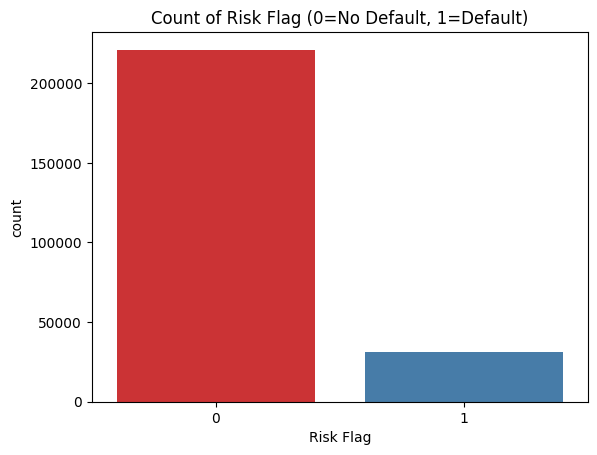

In [23]:
sns.countplot(x='Risk Flag', data=df, palette='Set1')
plt.title('Count of Risk Flag (0=No Default, 1=Default)')
plt.show()

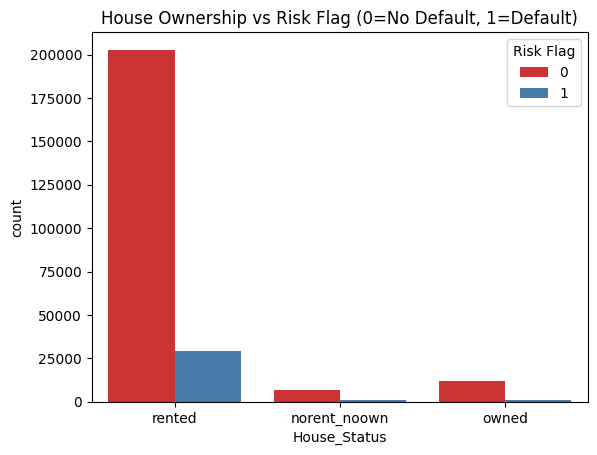

In [24]:
sns.countplot(x='House_Status', hue='Risk Flag', data=df, palette='Set1')
plt.title('House Ownership vs Risk Flag (0=No Default, 1=Default)')
plt.show()

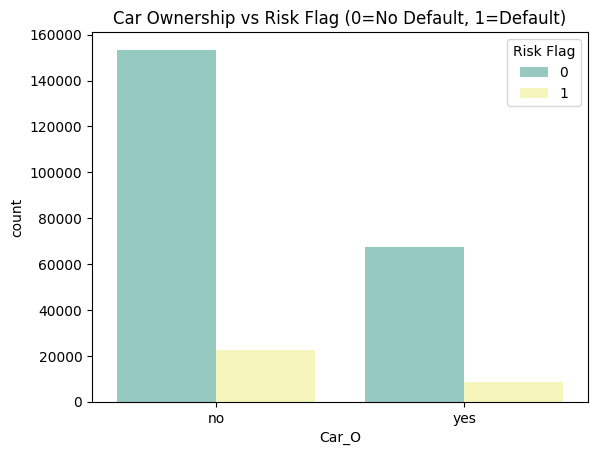

In [25]:
sns.countplot(x='Car_O', hue='Risk Flag', data=df, palette='Set3')
plt.title('Car Ownership vs Risk Flag (0=No Default, 1=Default)')
plt.show()

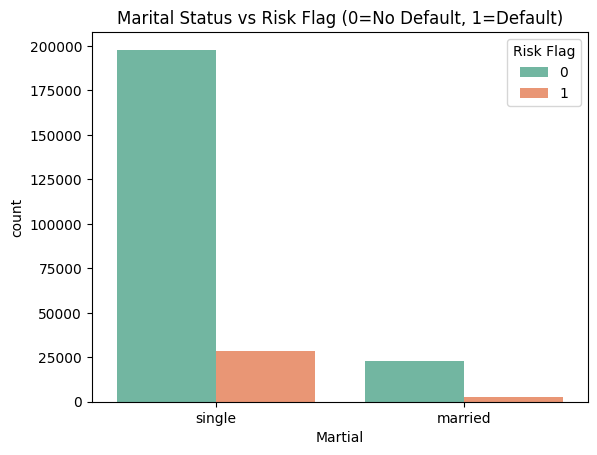

In [26]:
sns.countplot(x='Martial', hue='Risk Flag', data=df, palette='Set2')
plt.title('Marital Status vs Risk Flag (0=No Default, 1=Default)')
plt.show()

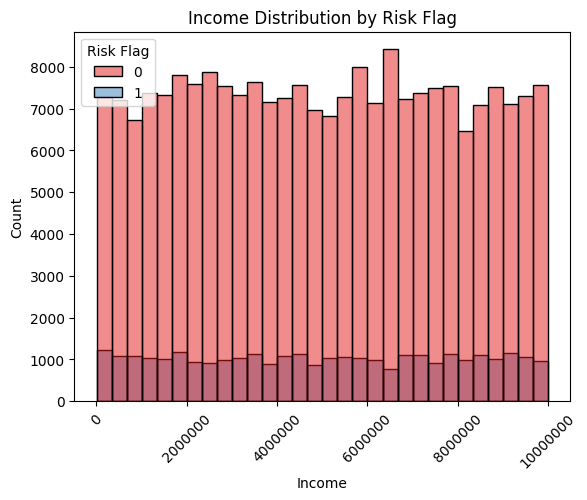

In [27]:
sns.histplot(data=df, x='Income', bins=30, hue='Risk Flag', palette='Set1', kde=False)
plt.title('Income Distribution by Risk Flag')
plt.xlabel('Income')
plt.xticks(rotation=45)
plt.gca().ticklabel_format(style='plain')  # Avoid scientific notation
plt.show()

In [28]:
print(df.head())

    Income  Age  Exp  Status  House  Car      City  Risk Flag  Martial  \
0  1303834   23    3       0      1    0  0.003167          0   single   
1  7574516   40   10       0      1    0  0.003369          0   single   
2  3991815   66    4       1      1    0  0.002730          0  married   
3  6256451   41    2       0      1    1  0.002409          1   single   
4  5768871   47   11       0      1    0  0.003210          1   single   

  House_Status Car_O  
0       rented    no  
1       rented    no  
2       rented    no  
3       rented   yes  
4       rented    no  


In [29]:
print(df.columns)

Index(['Income', 'Age', 'Exp', 'Status', 'House', 'Car', 'City', 'Risk Flag',
       'Martial', 'House_Status', 'Car_O'],
      dtype='object')


In [30]:
X=df.drop(['Risk Flag','Martial','House_Status','Car_O'],axis=1)
y=df['Risk Flag']
X_train,X_test,y_train,y_test= train_test_split(X,y,test_size=0.2,random_state=42,stratify=y)

In [31]:
rf_model = RandomForestClassifier(
    n_estimators=10,  # start with 10 trees
    random_state=42,
    class_weight='balanced',
    max_depth=10       # limit depth
)
rf_model.fit(X_train, y_train)

,n_estimators,10
,criterion,'gini'
,max_depth,10
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,'sqrt'
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,bootstrap,True
,oob_score,False


In [32]:
y_pred = rf_model.predict(X_test)
y_proba = rf_model.predict_proba(X_test)[:,1]

print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))
print("ROC-AUC:", roc_auc_score(y_test, y_proba))

Confusion Matrix:
 [[33662 10539]
 [ 2342  3857]]

Classification Report:
               precision    recall  f1-score   support

           0       0.93      0.76      0.84     44201
           1       0.27      0.62      0.37      6199

    accuracy                           0.74     50400
   macro avg       0.60      0.69      0.61     50400
weighted avg       0.85      0.74      0.78     50400

ROC-AUC: 0.7625588545432473


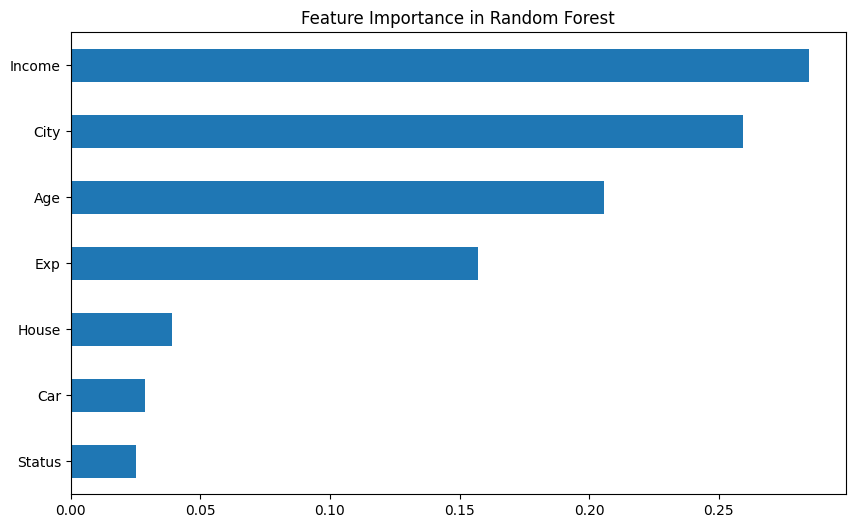

In [33]:
feat_importance = pd.Series(rf_model.feature_importances_, index=X.columns)
feat_importance.sort_values().plot(kind='barh', figsize=(10,6))
plt.title('Feature Importance in Random Forest')
plt.show()